<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab3/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Global YouTube Statistics.csv", encoding='unicode_escape')
df.head(6)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [6]:
#Удаление
df_cleared = df.dropna()
df_cleared

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99,United States,US,Entertainment,...,100000.0,2012.0,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [7]:
df_cleared.describe()
#"утерянна почти половина данных счетчик был 995 и стал 554 это ~45% данных"

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,554.000000,5.540000e+02,5.540000e+02,554.000000,5.540000e+02,554.000000,554.000000,5.540000e+02,554.000000,5.540000e+02,...,5.540000e+02,5.540000e+02,554.000000,554.000000,554.000000,5.540000e+02,554.000000,5.540000e+02,554.000000,554.000000
mean,463.828520,2.462401e+07,1.310608e+10,14758.036101,1.297121e+05,180.850181,238.034296,2.387087e+08,52604.206895,8.409689e+05,...,1.009984e+07,3.431256e+05,2012.492780,15.259928,60.533574,4.965559e+08,8.866029,2.402031e+08,25.887766,-5.850585
std,289.929893,1.950924e+07,1.729334e+10,44248.913413,6.815954e+05,732.093496,937.109139,4.862804e+08,76120.564578,1.216598e+06,...,1.461488e+07,5.881429e+05,4.468591,8.771828,26.365440,5.178813e+08,4.813768,1.641213e+08,20.251021,84.737945
min,1.000000,1.230000e+07,2.634000e+03,1.000000,1.000000e+00,1.000000,1.000000,3.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,206.500000,1.490000e+07,5.102920e+09,436.500000,2.222500e+02,10.000000,19.000000,4.906325e+07,11625.000000,1.862750e+05,...,2.200000e+06,1.000000e+05,2009.000000,8.000000,28.100000,1.023202e+08,5.360000,5.770569e+07,20.593684,-95.712891
50%,448.500000,1.880000e+07,9.040989e+09,1278.000000,5.695000e+02,40.500000,48.000000,1.150635e+08,28250.000000,4.521000e+05,...,5.400000e+06,2.000000e+05,2013.000000,15.000000,60.000000,3.282395e+08,5.560000,2.706630e+08,29.843491,-3.435973
75%,702.750000,2.670000e+07,1.540470e+10,4142.500000,1.580500e+03,104.750000,114.500000,2.380330e+08,58825.000000,9.414000e+05,...,1.127500e+07,4.000000e+05,2015.750000,22.000000,88.200000,1.366418e+09,14.700000,4.710315e+08,37.090240,78.962880
max,995.000000,2.450000e+08,2.280000e+11,301308.000000,4.054962e+06,7683.000000,7670.000000,6.589000e+09,576000.000000,9.200000e+06,...,1.106000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.524010,138.252924


In [8]:
#Заполнение при помощи медианы
df_filled_median = df.fillna(df.median())
df_filled_median['Gross tertiary education enrollment (%)'].describe()
#"появились лишние данные(872 и 995) , есть искажения в mean(63.627752 и 64.168241), std(26.106893 и 24.480683), 25%(36.3 и 40.2)"

C:\Users\Grigory\AppData\Local\Temp\ipykernel_15052\1121195688.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_median = df.fillna(df.median())


count    995.000000
mean      64.168241
std       24.480683
min        7.600000
25%       40.200000
50%       68.000000
75%       88.200000
max      113.100000
Name: Gross tertiary education enrollment (%), dtype: float64

In [9]:
#Заполнение при помощи среднего
df_filled_mean = df.fillna(df.mean())
df_filled_mean['Gross tertiary education enrollment (%)'].describe()
#"появились лишние данные , есть искажения в std(26.106893 и 24.438305), 25%(36.3), 50%(68.0)"

C:\Users\Grigory\AppData\Local\Temp\ipykernel_15052\2842696720.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_mean = df.fillna(df.mean())


count    995.000000
mean      63.627752
std       24.438305
min        7.600000
25%       40.200000
50%       63.627752
75%       88.200000
max      113.100000
Name: Gross tertiary education enrollment (%), dtype: float64

In [10]:
#Заполнение при помощи моды
df_filled_mode = df.fillna(df.mode())
df_filled_mode['Gross tertiary education enrollment (%)'].describe()
#нет искажение и лишних данных

count    872.000000
mean      63.627752
std       26.106893
min        7.600000
25%       36.300000
50%       68.000000
75%       88.200000
max      113.100000
Name: Gross tertiary education enrollment (%), dtype: float64

In [11]:
#Заполнение при помощи интерполяции
df_filled_interpolate = df.fillna(df.interpolate())
df_filled_interpolate['Gross tertiary education enrollment (%)'].describe()
#"появились лишние данные , есть искажения в mean(63.627752), std(26.106893), 25%(36.3), 50%(68.0)"

count    995.000000
mean      63.426985
std       25.221294
min        7.600000
25%       36.800000
50%       65.400000
75%       88.200000
max      113.100000
Name: Gross tertiary education enrollment (%), dtype: float64

In [12]:
df_full = df_filled_interpolate
df_full['Gross tertiary education enrollment (%)'].describe()
#"появились лишние данные , есть искажения в mean(63.627752), std(26.106893), 25%(36.3), 50%(68.0)"

count    995.000000
mean      63.426985
std       25.221294
min        7.600000
25%       36.800000
50%       65.400000
75%       88.200000
max      113.100000
Name: Gross tertiary education enrollment (%), dtype: float64

**Объясните**

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


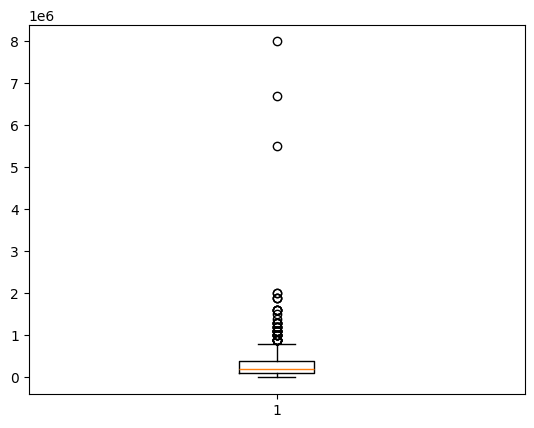

In [13]:
#Методом среднего
df = df.dropna()
plt.boxplot(df["subscribers_for_last_30_days"])
plt.show()

In [14]:
df["subscribers_for_last_30_days"].describe()

count    5.540000e+02
mean     3.431256e+05
std      5.881429e+05
min      1.000000e+00
25%      1.000000e+05
50%      2.000000e+05
75%      4.000000e+05
max      8.000000e+06
Name: subscribers_for_last_30_days, dtype: float64

In [38]:
mean = df["subscribers_for_last_30_days"].mean()
std_deviation = df["subscribers_for_last_30_days"].std()
threshold = 3 * std_deviation

#выбросы
outliers = [x for x in df["subscribers_for_last_30_days"] if abs(x - mean) > threshold]
print(outliers)
print(mean)
print(std_deviation)
print(threshold)

[8000000.0, 5500000.0, 6700000.0]
343125.5505415162
588142.8744035586
1764428.6232106755


{'whiskers': [<matplotlib.lines.Line2D at 0x201869cf6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x201869cfbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x201869cf400>],
 'medians': [<matplotlib.lines.Line2D at 0x201869d8160>],
 'fliers': [<matplotlib.lines.Line2D at 0x201869d8400>],
 'means': []}

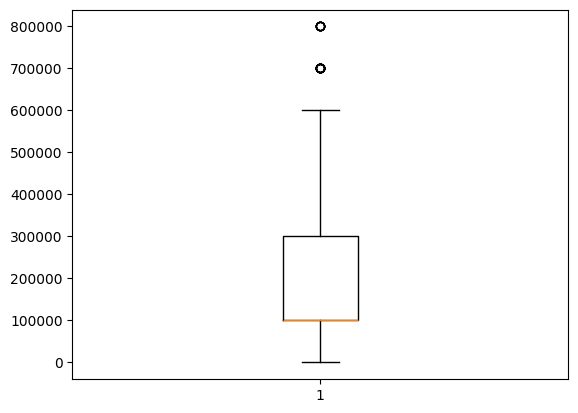

In [22]:
#При помощи межквартильного размаха
q1 = df["subscribers_for_last_30_days"].quantile(0.25)
q3 = df["subscribers_for_last_30_days"].quantile(0.75)
IQR = q3 - q1
df_IQR = df[(df["subscribers_for_last_30_days"] >= (q1-1.5*IQR )) & (df["subscribers_for_last_30_days"] <= (q3+1.5*IQR))]
plt.boxplot(df_IQR["subscribers_for_last_30_days"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20186e732e0>,
 'caps': [<matplotlib.lines.Line2D at 0x20186e73820>,
 'boxes': [<matplotlib.lines.Line2D at 0x20186e71f60>],
 'medians': [<matplotlib.lines.Line2D at 0x20186e73d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x20186ea0040>],
 'means': []}

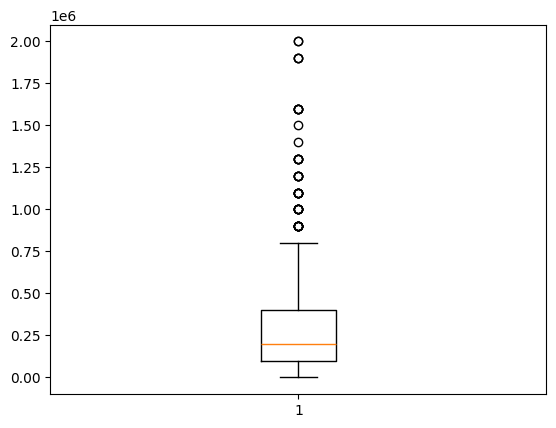

In [36]:
#Статистика и объяснение

df1 = df.query('subscribers_for_last_30_days not in [8000000.0, 5500000.0, 6700000.0]')
plt.boxplot(df1['subscribers_for_last_30_days'])


**Объяснения**

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [26]:
#Проверка на дубли
df_duplicate = df[df.duplicated()]
df_duplicate

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


In [41]:
#создание дублей
df = pd.concat((df, df.iloc[0:100]))
df_duplicate = df[df.duplicated()]
df_duplicate

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,131,BabyBus - Kids Songs and Cartoons,32800000,2.635509e+10,Education,BabyBus - Kids Songs and Cartoons,2122,United States,US,Education,...,200000.0,2016.0,Jul,15.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
131,132,Eros Now Music,32700000,1.785380e+10,Entertainment,Mzaalo,1521,India,IN,Entertainment,...,40000.0,2012.0,Mar,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
133,134,DisneyMusicVEVO,32700000,2.851625e+10,Music,DisneyMusicVEVO,2068,United States,US,Music,...,300000.0,2010.0,May,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
134,135,The Weeknd,32600000,2.337997e+10,Music,The Weeknd,169,Canada,CA,Music,...,200000.0,2011.0,Feb,25.0,68.9,3.699198e+07,5.56,30628482.0,56.130366,-106.346771


In [44]:
#Удаление дублей
df = df.drop_duplicates()
df_no_duplicates = df[df.duplicated()]
df_no_duplicates


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating instances
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

Масштабируйте категориальные признаки через OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])